In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
chart_size= [10,10]

In [5]:
proj="SN3"

## LISTAS

In [6]:
cover         = ['CE', 'CQ']

fresh_clean   = ['HC', 'HF', 'JP']
str_ore       = ['HC', 'HF']
ore_rocks     = ['CE', 'HC', 'HF', 'HMN']
basin_rocks   = ['JP', 'HF', 'HC', 'HMN']
mineralized   = ['CE', 'HC', 'HF', 'HMN', 'FMN', 'JP']
waste         = ['CQ', 'MD', 'MS', 'MSD', 'BR']

model_rocks = ['CE', 'HC', 'HF', 'HMN', 'FMN', 'JP', 'CQ', 'MD', 'MSD', 'MS', 'BR' ]

teores_gl     = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL']
faixas        = ['g1', 'g1a', 'g1b', 'g2', 'g3']
param_event   = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL', 'G1', 'G1A', 'G1B', 'G2', 'G3']

not_countable = ['FURO','NA','DE','ATE','CLV','CLM','FLX_AN','FLX_AN_OR','DA_ANA','DA_SAM','d_agru','tipo_am','global','mass_t','status']

gran_batch = ['G1A', 'G1B', 'G2', 'G3']

set_g1a = ['G1A','FE1A', 'SI1A', 'P1A', 'AL1A', 'MN1A', 'PF1A', 'TI1A', 'MG1A', 'CA1A']
set_g1b = ['G1B','FE1B', 'SI1B', 'P1B', 'AL1B', 'MN1B','PF1B', 'TI1B', 'MG1B', 'CA1B']
set_g2 = ['G2','FE2', 'SI2', 'P2', 'AL2','MN2', 'PF2', 'TI2', 'MG2', 'CA2']
set_g3 = ['G3','FE3', 'SI3', 'P3', 'AL3', 'MN3','PF3', 'TI3', 'MG3', 'CA3']

v_krig = [ 'FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL', \
            'G1A', 'G1B', 'G2', 'G3','FE1A', 'SI1A', 'P1A', 'AL1A', 'MN1A', 'PF1A', 'TI1A', 'MG1A', 'CA1A', \
            'FE1B', 'SI1B', 'P1B', 'AL1B', 'MN1B','PF1B', 'TI1B', 'MG1B', 'CA1B', \
            'FE2', 'SI2', 'P2', 'AL2','MN2', 'PF2', 'TI2', 'MG2', 'CA2', \
            'FE3', 'SI3', 'P3', 'AL3', 'MN3','PF3', 'TI3', 'MG3', 'CA3']

litocolor=dict(AG= "#FFEEBB",AT= "#777777",CE= "#00AA00",CH= "#FFFF00",CQ= "#77FFBB", \
               FMN= "#7766DD",HC= "#EE0000",HF= "#EE00DD",HMN= "#995555",JP= "#004488", \
               LT= "#99BB99",MD= "#CC8800",MS= "#99BB99",MSD= "#DDCC77",QT= "#776655", \
               SO= "#336611",SR= "#FFFFFF",XI= "#CC8800", BR= "#BB133E")


valecolor= dict(VERDE='#007E7A',LARANJA='#ECB11F',CINZA='#6F7070',BRANCO='#FFFFFF', \
                LARANJA2='#E37222',VERMELHO='#BB133E',AZUL='#3D7EDB',AZUL2='#00B0CA', \
                VERDE2='#69BE28',AMARELO='#DFDF00')

## LOAD DATA

In [7]:
fso = pd.read_csv('sn3flp_fso_assay.csv', low_memory=False, na_values='-99', encoding="latin1")
fso.rename(columns=str.upper, inplace=True)

In [8]:
fac = pd.read_csv('sn3flp_fac_assay.csv', low_memory=False, na_values='-99', encoding="latin1")
fac.rename(columns=str.upper, inplace=True)

In [9]:
cac=  pd.read_csv('sn3flp_cac_entry.csv', low_memory=False, na_values='-99', encoding="latin1")
cac.rename(columns=str.upper, inplace=True)

In [10]:
base_bmf = pd.read_csv('sn3_1121_base.csv', low_memory=False, na_values='-99', encoding="latin1", skiprows=[1,2,3,4])
base_bmf.rename(columns=str.upper, inplace=True)
base_bmf['LITO_3D']=base_bmf['LITO_3D'].str.upper()

In [9]:
bmf = pd.read_csv('sn3_1121_bck01_est_01.csv', low_memory=False, na_values='-99', encoding="latin1", skiprows=[1,2,3,4])
bmf.rename(columns=str.upper, inplace=True)
bmf['LITO']=bmf['LITO'].str.upper()

In [10]:
bmf.head(5)

CENTROID_X  CENTROID_Y  CENTROID_Z  DIM_X  DIM_Y  DIM_Z   VOLUME LITO  \
0   587236.25  9331738.75       207.5   12.5   12.5   15.0  2343.75   JP   
1   587248.75  9331738.75       207.5   12.5   12.5   15.0  2343.75   JP   
2   587223.75  9331751.25       207.5   12.5   12.5   15.0  2343.75   JP   
3   587211.25  9331751.25       207.5   12.5   12.5   15.0  2343.75   JP   
4   587248.75  9331751.25       207.5   12.5   12.5   15.0  2343.75   JP   

  LITO_3D RECURSO  TOPO  DENS_N   MINE  FF_EXPAND  PIT_FLAG SETOR  TRIDIST  \
0      jp       n   1.0     NaN  100.0        1.0       1.0     n      NaN   
1      jp       n   1.0     NaN  100.0        1.0       1.0     n      NaN   
2      jp       n   1.0     NaN  100.0        1.0       1.0     n      NaN   
3      jp       n   1.0     NaN  100.0        1.0       1.0     n      NaN   
4      jp       n   1.0     NaN  100.0        1.0       1.0     n      NaN   

   AUX  ORE  XINDEX  YINDEX       FEGL       SIGL       PGL      ALGL  \
0  NaN  1.0    49.0    12.0  32.877792  50.220467  0.021218  0.261688   
1  NaN  1.0    50.0    12.0  32.877792  50.220467  0.021218  0.261688   
2  NaN  1.0    49.0    12.0  32.877792  50.220467  0.021218  0.261688   
3  NaN  1.0    49.0    12.0  32.877792  50.220467  0.021218  0.261688   
4  NaN  1.0    50.0    12.0  32.877792  50.220467  0.021218  0.261688   

       MNGL     PFGL      TIGL      MGGL      CAGL     FEGL_C     SIGL_C  \
0  0.054147  1.22108  0.071073  0.026181  0.017441  32.877792  50.220467   
1  0.054147  1.22108  0.071073  0.026181  0.017441  32.877792  50.220467   
2  0.054147  1.22108  0.071073  0.026181  0.017441  32.877792  50.220467   
3  0.054147  1.22108  0.071073  0.026181  0.017441  32.877792  50.220467   
4  0.054147  1.22108  0.071073  0.026181  0.017441  32.877792  50.220467   

      PGL_C    ALGL_C    MNGL_C   PFGL_C    TIGL_C    MGGL_C    CAGL_C  G1  \
0  0.021218  0.261688  0.054147  1.22108  0.071073  0.026181  0.017441 NaN   
1  0.021218  0.261688  0.054147  1.22108  0.071073  0.026181  0.017441 NaN   
2  0.021218  0.261688  0.054147  1.22108  0.071073  0.026181  0.017441 NaN   
3  0.021218  0.261688  0.054147  1.22108  0.071073  0.026181  0.017441 NaN   
4  0.021218  0.261688  0.054147  1.22108  0.071073  0.026181  0.017441 NaN   

         G1A   G1B    G2    G3  AFE1  ASI1  AP1  AAL1  AMN1  APF1  ATI1  AMG1  \
0  73.699997  14.6  10.0  1.72   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1  73.699997  14.6  10.0  1.72   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
2  73.699997  14.6  10.0  1.72   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
3  73.699997  14.6  10.0  1.72   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   
4  73.699997  14.6  10.0  1.72   NaN   NaN  NaN   NaN   NaN   NaN   NaN   NaN   

   ACA1        AFE1A        ASI1A   AP1A      AAL1A   AMN1A      APF1A  \
0   NaN  2401.145996  3725.534668  1.474  16.213999  3.0954  89.914001   
1   NaN  2401.145996  3725.534668  1.474  16.213999  3.0954  89.914001   
2   NaN  2401.145996  3725.534668  1.474  16.213999  3.0954  89.914001   
3   NaN  2401.145996  3725.534668  1.474  16.213999  3.0954  89.914001   
4   NaN  2401.145996  3725.534668  1.474  16.213999  3.0954  89.914001   

    ATI1A   AMG1A   ACA1A       AFE1B       ASI1B    AP1B  AAL1B   AMN1B  \
0  5.7486  1.8425  1.2529  498.590027  718.612061  0.3066  4.088  0.7592   
1  5.7486  1.8425  1.2529  498.590027  718.612061  0.3066  4.088  0.7592   
2  5.7486  1.8425  1.2529  498.590027  718.612061  0.3066  4.088  0.7592   
3  5.7486  1.8425  1.2529  498.590027  718.612061  0.3066  4.088  0.7592   
4  5.7486  1.8425  1.2529  498.590027  718.612061  0.3066  4.088  0.7592   

       APF1B   ATI1B  AMG1B   ACA1B        AFE2        ASI2   AP2  AAL2  AMN2  \
0  16.060001  0.5694  0.365  0.2482  337.290009  486.970001  0.29  3.98   1.2   
1  16.060001  0.5694  0.365  0.2482  337.290009  486.970001  0.29  3.98   1.2   
2  16.060001  0.5694  0.365  0.2482  337.290009  486.970001  0.29  3.98   1.2   

In [11]:
bmf.groupby('LITO').count()

CENTROID_X  CENTROID_Y  CENTROID_Z  DIM_X  DIM_Y  DIM_Z  VOLUME  \
LITO                                                                    
CE         19941       19941       19941  19941  19941  19941   19941   
CQ         45064       45064       45064  45064  45064  45064   45064   
FMN           87          87          87     87     87     87      87   
HC          2065        2065        2065   2065   2065   2065    2065   
HF         28286       28286       28286  28286  28286  28286   28286   
HMN          243         243         243    243    243    243     243   
JP         41282       41282       41282  41282  41282  41282   41282   

      LITO_3D  RECURSO   TOPO  DENS_N   MINE  FF_EXPAND  PIT_FLAG  SETOR  \
LITO                                                                       
CE      19941    19941  19941       0  19941      19941     19941  19941   
CQ      45064    45064  45064       0  45064      45064     45064  45064   
FMN        87       87     87       0     87         87        87     87   
HC       2065     2065   2065       0   2065       2065      2065   2065   
HF      28286    28286  28286       0  28286      28286     28286  28286   
HMN       243      243    243       0    243        243       243    243   
JP      41282    41282  41282       0  41282      41282     41282  41282   

      TRIDIST   AUX    ORE  XINDEX  YINDEX   FEGL   SIGL    PGL   ALGL   MNGL  \
LITO                                                                            
CE          0   158  19941   19941   19941  19941  19941  19941  19941  19941   
CQ          0  1782  45064   45064   45064  45064  45064  45064  45064  45064   
FMN         0    30     87      87      87     87     87     87     87     87   
HC          0    54   2065    2065    2065   2065   2065   2065   2065   2065   
HF          0    76  28286   28286   28286  28286  28286  28286  28286  28286   
HMN         0     0    243     243     243    243    243    243    243    243   
JP          0   393  41282   41282   41282  41282  41282  41282  41282  41282   

       PFGL   TIGL   MGGL   CAGL  FEGL_C  SIGL_C  PGL_C  ALGL_C  MNGL_C  \
LITO                                                                      
CE    19941  19941  19941  19941   19941   19941  19941   19941   19941   
CQ    45064  45064  45064  45064   45064   45064  45064   45064   45064   
FMN      87     87     87     87      87      87     87      87      87   
HC     2065   2065   2065   2065    2065    2065   2065    2065    2065   
HF    28286  28286  28286  28286   28286   28286  28286   28286   28286   
HMN     243    243    243    243     243     243    243     243     243   
JP    41282  41282  41282  41282   41282   41282  41282   41282   41282   

      PFGL_C  TIGL_C  MGGL_C  CAGL_C  G1    G1A    G1B     G2     G3  AFE1  \
LITO                                                                         
CE     19941   19941   19941   19941   0  19941  19941  19941  19941     0   
CQ     45064   45064   45064   45064   0  45064  45064  45064  45064     0   
FMN       87      87      87      87   0     87     87     87     87     0   
HC      2065    2065    2065    2065   0   2065   2065   2065   2065     0   
HF     28286   28286   28286   28286   0  28286  28286  28286  28286     0   
HMN      243     243     243     243   0    243    243    243    243     0   
JP     41282   41282   41282   41282   0  41282  41282  41282  41282     0   

      ASI1  AP1  AAL1  AMN1  APF1  ATI1  AMG1  ACA1  AFE1A  ASI1A   AP1A  \
LITO                                                                       
CE       0    0     0     0     0     0     0     0  19941  19941  19941   
CQ       0    0     0     0     0     0     0     0  45064  45064  45064   
FMN      0    0     0     0     0     0     0     0     87     87     87   
HC       0    0     0     0     0     0     0     0   2065   2065   2065   
HF       0    0     0     0     0     0     0     0  28286  28286  28286   
HMN      0    0     0 

In [12]:
base_bmf.LITO_3D.unique()

array(['MS', 'FAC', 'JP', 'MSD', 'MD', 'HF', 'HC', 'CQ', 'BR', 'FMN',
       'CE', 'HMN'], dtype=object)

In [13]:
#base bmf volume
vol_bmf = base_bmf.loc[0:, ['VOLUME', 'LITO_3D']]
total_vol = vol_bmf.groupby('LITO_3D').sum()


In [14]:
total_vol.to_csv('sn3_1121_vol_by_lito.csv')

In [15]:
bmf_gl = bmf.loc[0:, ['LITO'] + teores_gl]

In [11]:
fac.groupby('CLI').count()

FURO   NA   DE  ATE  LENGTH  CLV  FEGL  SIGL  PGL  ALGL  MNGL  PFGL  \
CLI                                                                        
BR      1    1    1    1       1    1     0     0    0     0     0     0   
CE    176  176  176  176     176  176   162   162  162   162   162   162   
CQ    268  268  268  268     268  268   199   199  199   199   199   199   
DT      2    2    2    2       2    2     0     0    0     0     0     0   
FMN    10   10   10   10      10   10     8     8    8     8     8     8   
HC    130  130  130  130     130  130   124   124  124   124   124   124   
HF    630  630  630  630     630  630   586   586  586   586   586   586   
HMN    21   21   21   21      21   21    19    19   19    19    19    19   
JP    440  440  440  440     440  440   279   279  279   279   279   279   
MD    676  676  676  676     676  676   242   242  242   242   242   242   
MS    344  344  344  344     344  344    73    73   73    73    73    73   
MSD   309  309  309  309     309  309    53    53   53    53    53    53   
SR     84   84   84   84      84   84     0     0    0     0     0     0   

     CAGL  MGGL  TIGL  G1A  G1B   G2   G3  FE1A  SI1A  P1A  AL1A  MN1A  PF1A  \
CLI                                                                            
BR      0     0     0    0    0    0    0     0     0    0     0     0     0   
CE    162   162   162  127  127  127  127   127   127  127   127   127   127   
CQ    199   199   199  137  137  137  137   137   137  137   137   137   137   
DT      0     0     0    0    0    0    0     0     0    0     0     0     0   
FMN     8     8     8    5    5    5    5     5     5    5     5     5     5   
HC    124   124   124   68   68   68   68    68    68   68    68    68    68   
HF    586   586   586  456  456  456  456   334   334  334   334   334   334   
HMN    19    19    19   15   15   15   15    15    15   15    15    15    15   
JP    279   279   279  215  215  215  215   209   209  209   209   209   209   
MD    242   242   242    7    7    7    7     7     7    7     7     7     7   
MS     73    73    73    0    0    0    0     0     0    0     0     0     0   
MSD    53    53    53    0    0    0    0     0     0    0     0     0     0   
SR      0     0     0    0    0    0    0     0     0    0     0     0     0   

     CA1A  MG1A  TI1A  FE1B  SI1B  P1B  AL1B  MN1B  PF1B  CA1B  MG1B  TI1B  \
CLI                                                                          
BR      0     0     0     0     0    0     0     0     0     0     0     0   
CE    127   127   127   121   121  121   121   121   121   121   121   121   
CQ    137   137   137   136   136  136   136   136   136   136   136   136   
DT      0     0     0     0     0    0     0     0     0     0     0     0   
FMN     5     5     5     5     5    5     5     5     5     5     5     5   
HC     68    68    68    68    68   68    68    68    68    68    68    68   
HF    334   334   334   455   455  455   455   455   455   455   455   455   
HMN    15    15    15    15    15   15    15    15    15    15    15    15   
JP    209   209   209   188   188  188   188   188   188   188   188   188   
MD      7     7     7     7     7    7     7     7     7     7     7     7   
MS      0     0     0     0     0    0     0     0     0     0     0     0   
MSD     0     0     0     0     0    0     0     0     0     0     0     0   
SR      0     0     0     0     0    0     0     0     0     0     0     0   

     FE2  SI2   P2  AL2  MN2  PF2  CA2  MG2  TI2  FE3  SI3   P3  AL3  MN3  \
CLI                                                                         
BR     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
CE   116  116  116  116  116  116  116  116  116   92   92   92   92   92   
CQ   135  135  135  135  135  135  135  135  135  124  124  124  124  124   
DT     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
FMN    5    5    5    5    5  

In [12]:
cac.groupby('GEOCOD').count()

COMPID  DHID  MIDX  MIDY  MIDZ  LENGTH  FROM    TO  GEOCD2  BOUND  \
GEOCOD                                                                      
BR           1     1     1     1     1       1     1     1       1      0   
CE         147   147   147   147   147     147   147   147     147      0   
CQ         257   257   257   257   257     257   257   257     257      0   
DT          36    36    36    36    36      36    36    36      36      0   
FMN         10    10    10    10    10      10    10    10      10      0   
HC          98    98    98    98    98      98    98    98      98      0   
HF         491   491   491   491   491     491   491   491     491      0   
HMN         21    21    21    21    21      21    21    21      21      0   
JP         515   515   515   515   515     515   515   515     515      0   
MD        1481  1481  1481  1481  1481    1481  1481  1481    1481      0   
MS         653   653   653   653   653     653   653   653     653      0   
MSD        530   530   530   530   530     530   530   530     530      0   
SR          80    80    80    80    80      80    80    80      80      0   

        EXTREM  FEGL  SIGL  PGL  ALGL  MNGL  PFGL  CAGL  MGGL  TIGL  G1A  G1B  \
GEOCOD                                                                          
BR           1     0     0    0     0     0     0     0     0     0    0    0   
CE         147   133   133  133   133   133   133   133   133   133  110  110   
CQ         257   178   178  178   178   178   178   178   178   178  123  123   
DT          36     0     0    0     0     0     0     0     0     0    0    0   
FMN         10     8     8    8     8     8     8     8     8     8    5    5   
HC          98    92    92   92    92    92    92    92    92    92   59   59   
HF         491   454   454  454   454   454   454   454   454   454  365  365   
HMN         21    19    19   19    19    19    19    19    19    19   15   15   
JP         515   229   229  229   229   229   229   229   229   229  182  182   
MD        1481   224   224  224   224   224   224   224   224   224    7    7   
MS         653    65    65   65    65    65    65    65    65    65    0    0   
MSD        530    51    51   51    51    51    51    51    51    51    0    0   
SR          80     0     0    0     0     0     0     0     0     0    0    0   

         G2   G3  FE1A  SI1A  P1A  AL1A  MN1A  PF1A  CA1A  MG1A  TI1A  FE1B  \
GEOCOD                                                                        
BR        0    0     0     0    0     0     0     0     0     0     0     0   
CE      110  110   110   110  110   110   110   110   110   110   110   105   
CQ      123  123   123   123  123   123   123   123   123   123   123   122   
DT        0    0     0     0    0     0     0     0     0     0     0     0   
FMN       5    5     5     5    5     5     5     5     5     5     5     5   
HC       59   59    59    59   59    59    59    59    59    59    59    59   
HF      365  365   302   302  302   302   302   302   302   302   302   365   
HMN      15   15    15    15   15    15    15    15    15    15    15    15   
JP      182  182   180   180  180   180   180   180   180   180   180   168   
MD        7    7     7     7    7     7     7     7     7     7     7     7   
MS        0    0     0     0    0     0     0     0     0     0     0     0   
MSD       0    0     0     0    0     0     0     0     0     0     0     0   
SR        0    0     0     0    0     0     0     0     0     0     0     0   

        SI1B  P1B  AL1B  MN1B  PF1B  CA1B  MG1B  TI1B  FE2  SI2   P2  AL2  \
GEOCOD                                                                      
BR         0    0     0     0     0     0     0     0    0    0    0    0   
CE       105  105   105   105   105   105   105   105  101  101  101  101   
CQ       122  122   122   122   122   122   122   122  122  122  122  122   
DT         0    0     0     0     0     0     0     0    0    0  

In [16]:
bmf_gl.head(5)

LITO       FEGL       SIGL       PGL      ALGL      MNGL     PFGL      TIGL  \
0   JP  32.877792  50.220467  0.021218  0.261688  0.054147  1.22108  0.071073   
1   JP  32.877792  50.220467  0.021218  0.261688  0.054147  1.22108  0.071073   
2   JP  32.877792  50.220467  0.021218  0.261688  0.054147  1.22108  0.071073   
3   JP  32.877792  50.220467  0.021218  0.261688  0.054147  1.22108  0.071073   
4   JP  32.877792  50.220467  0.021218  0.261688  0.054147  1.22108  0.071073   

       MGGL      CAGL  
0  0.026181  0.017441  
1  0.026181  0.017441  
2  0.026181  0.017441  
3  0.026181  0.017441  
4  0.026181  0.017441

In [17]:
VCOUNT = bmf_gl.count()

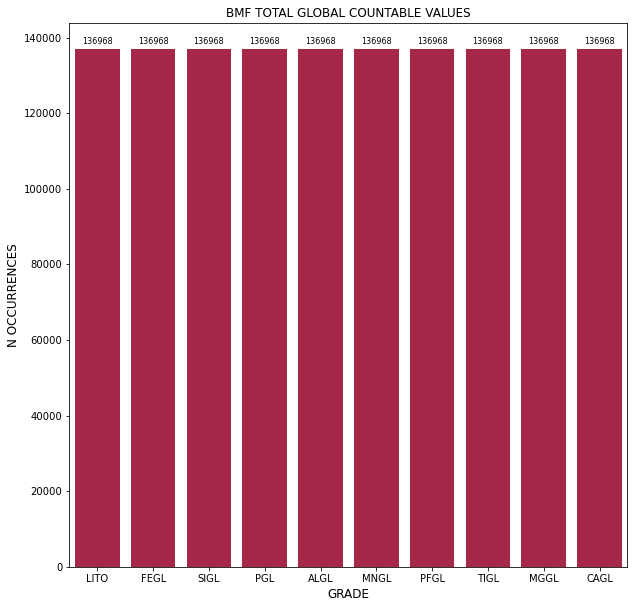

In [18]:
fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=VCOUNT.index, y=VCOUNT.values, color=valecolor['VERMELHO'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0F'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('BMF TOTAL GLOBAL COUNTABLE VALUES')
plt.ylabel('N OCCURRENCES', fontsize=12)
plt.xlabel('GRADE', fontsize=12)

plt.show()

fig.savefig(proj + '_BMF_GLOBAL_GRADE_counts.jpeg', transparent=None)

In [19]:
fac_krig = fac.loc[0:,  v_krig]

In [20]:
VCOUNT = fac_krig.count()

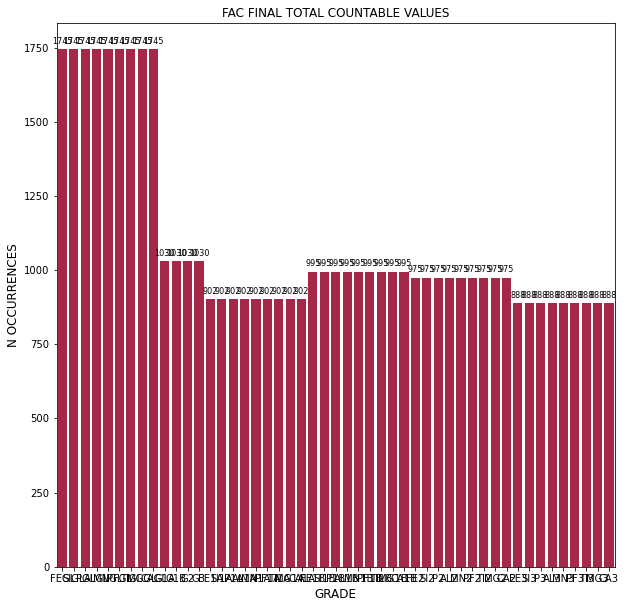

In [21]:
fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=VCOUNT.index, y=VCOUNT.values, color=valecolor['VERMELHO'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0F'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('FAC FINAL TOTAL COUNTABLE VALUES')
plt.ylabel('N OCCURRENCES', fontsize=12)
plt.xlabel('GRADE', fontsize=12)

plt.show()

fig.savefig(proj + '_FAC_FINAL_counts.jpeg', transparent=None)

In [22]:
fac_krig.describe()

FEGL         SIGL          PGL         ALGL         MNGL  \
count  1745.000000  1745.000000  1745.000000  1745.000000  1745.000000   
mean     48.952790    14.620715     0.058869     8.337221     0.341769   
std      19.021227    20.142563     0.074592     9.967485     0.809084   
min       7.330000     0.056000     0.002000     0.048000     0.005000   
25%      33.300000     0.568000     0.015000     1.033000     0.050000   
50%      58.433000     1.638000     0.030000     2.740000     0.085000   
75%      65.839000    29.600000     0.070000    14.800000     0.270000   
max      69.410000    72.119000     0.628000    45.750000    10.232000   

              PFGL         TIGL         MGGL         CAGL          G1A  \
count  1745.000000  1745.000000  1745.000000  1745.000000  1030.000000   
mean      4.984053     0.465589     0.588074     0.085121    36.340429   
std       5.248942     0.614510     1.960599     0.524862    33.972945   
min       0.030000     0.006000     0.002000     0.003000     0.000000   
25%       1.200000     0.053000     0.031000     0.013000     3.485000   
50%       2.421000     0.103000     0.047000     0.017000    25.950000   
75%       7.330000     0.803000     0.100000     0.024000    66.352500   
max      25.280000     3.770000    15.700000    10.036000   100.000000   

               G1B           G2           G3        FE1A        SI1A  \
count  1030.000000  1030.000000  1030.000000  902.000000  902.000000   
mean     12.412803    38.808994    12.439884   54.272666   10.822310   
std       6.750930    24.322741    11.281755   13.020721   18.458471   
min       0.000000     0.000000     0.000000    9.680000    0.050000   
25%       7.366500    15.459500     2.405000   42.232500    0.430000   
50%      12.350000    44.258500     9.400000   59.990000    0.740000   
75%      17.242250    61.400000    20.837500   65.438750    7.457500   
max      78.099000    90.900000    53.810000   69.440000   75.490000   

              P1A        AL1A        MN1A        PF1A        TI1A        MG1A  \
count  902.000000  902.000000  902.000000  902.000000  902.000000  902.000000   
mean     0.058233    5.951507    0.434930    4.266798    0.273582    0.081351   
std      0.076671    8.001045    1.564706    4.781859    0.438037    0.294561   
min      0.002000    0.020000    0.004000    0.030000    0.006000    0.007000   
25%      0.012000    0.720000    0.040000    0.990000    0.044000    0.025000   
50%      0.029000    2.576000    0.060000    2.560000    0.072000    0.046000   
75%      0.072000    7.165000    0.129250    5.167500    0.267500    0.077750   
max      0.646000   44.660000   15.700000   24.390000    3.575000    6.449000   

             CA1A        FE1B        SI1B         P1B        AL1B        MN1B  \
count  902.000000  995.000000  995.000000  995.000000  995.000000  995.000000   
mean     0.037877   57.442148    7.765501    0.052739    5.270289    0.329493   
std      0.408912   12.956265   15.733795    0.077557    8.314691    1.066785   
min      0.001000    9.770000    0.030000    0.002000    0.040000    0.004000   
25%      0.010000   49.550000    0.430000    0.011000    0.710000    0.040000   
50%      0.014000   64.020000    0.720000    0.021000    1.870000    0.063000   
75%      0.019000   66.861000    2.550000    0.055500    4.840000    0.130000   
max     10.759000   69.460000   70.300000    0.601000   45.790000   14.059000   

             PF1B        TI1B        MG1B        CA1B         FE2         SI2  \
count  995.000000  995.000000  995.000000  995.000000  975.000000  975.000000   
mean     3.712554    0.253702    0.077268    0.033981   57.519168    7.700249   
std      4.963654    0.431837    0.323164    0.337897   13.249237   15.511153   
min      0.010000    0.006000    0.001000    0.002000    9.421000    0.053000   
25%      0.870000    0.042000    0.025000    0.011000   50.487500    0.507000   
50%      1.720000    0.068000    0.035000    0.014000   64.463000    0.861000   
75% 

<AxesSubplot:xlabel='LENGTH', ylabel='Count'>

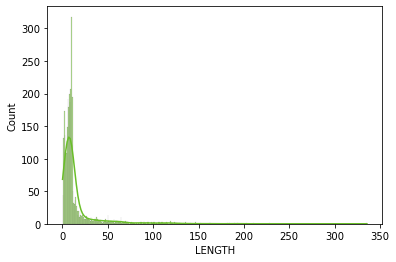

In [23]:
# HISTOGRAMA DE LENGTH
sea.histplot(data=fac, x="LENGTH", color=valecolor['VERDE2'], kde=True)

In [30]:
fac_sampled = fac[~fac['FEGL'].isna()]
cac_sampled = cac[~cac['FEGL'].isna()]

In [25]:
import ipywidgets as widgets

In [26]:
sl=widgets.IntSlider(
    value=2,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

In [27]:
def make_kde(bw):
    sea.kdeplot(data=fac, x="LENGTH", color=valecolor['VERDE2'], bw_adjust=bw)

interactive(children=(FloatSlider(value=2.5000000000000004, description='bw', max=5.0, min=0.1), Output()), _d…

<function __main__.make_kde(bw)>

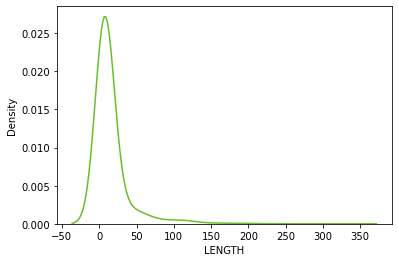

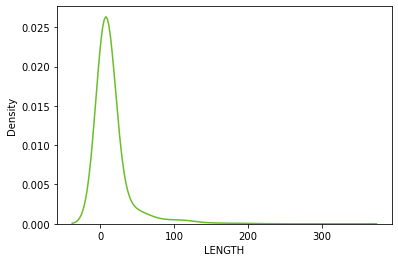

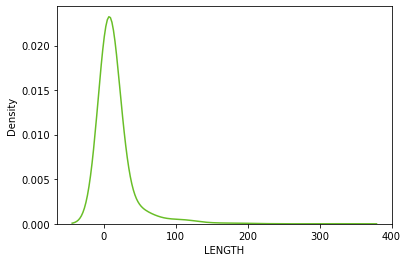

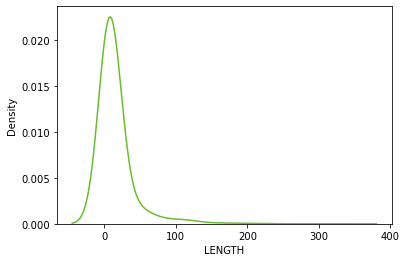

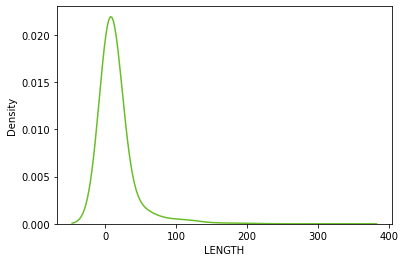

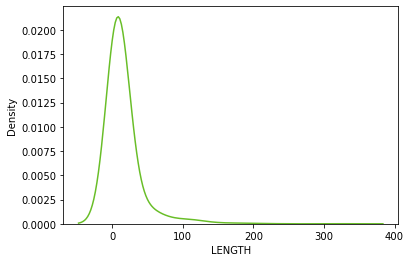

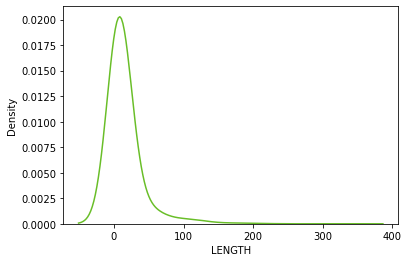

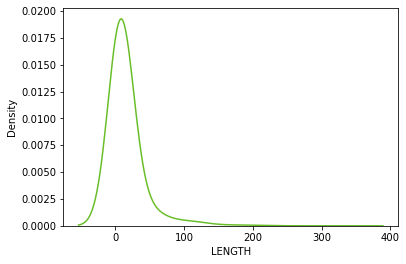

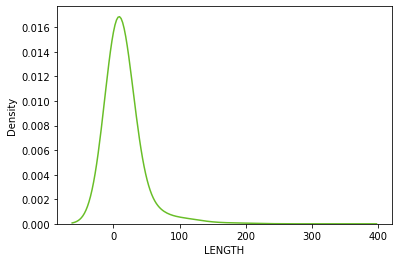

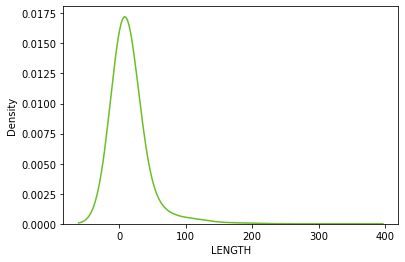

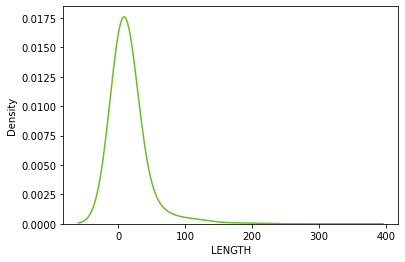

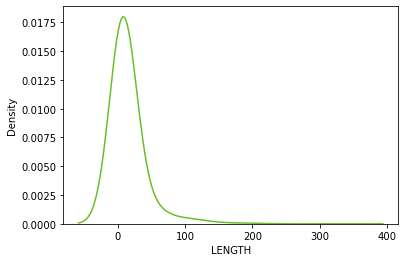

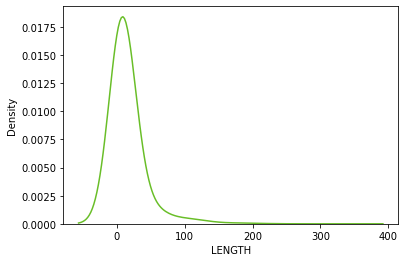

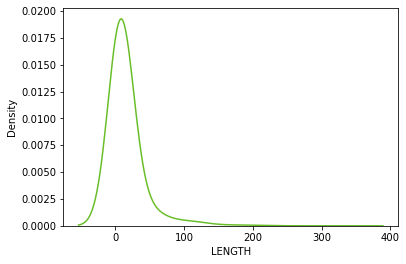

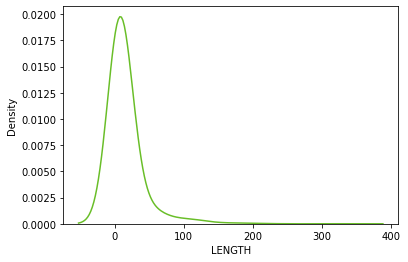

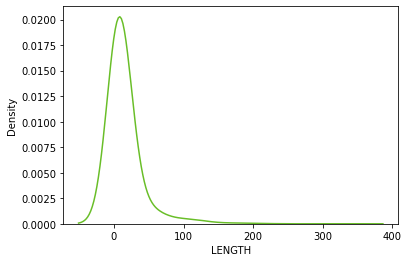

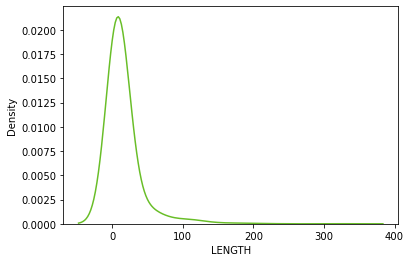

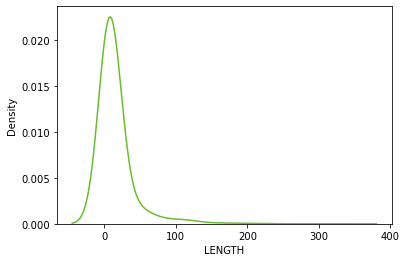

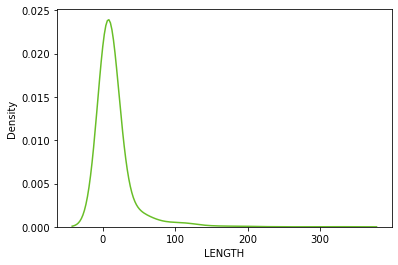

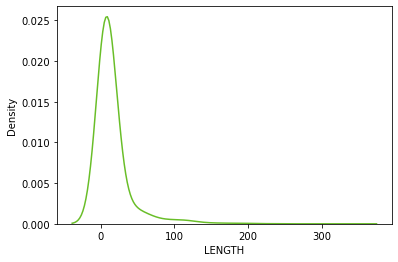

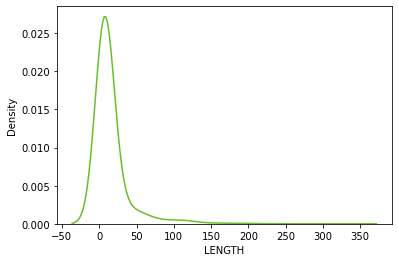

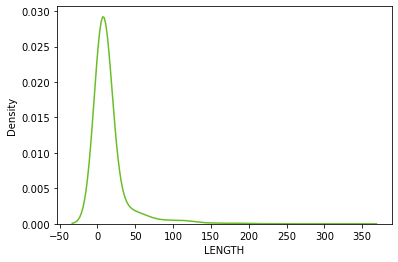

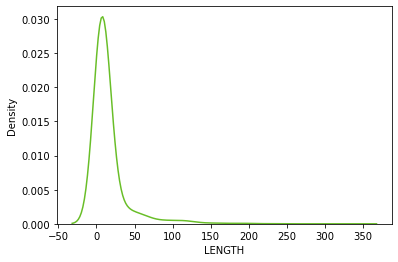

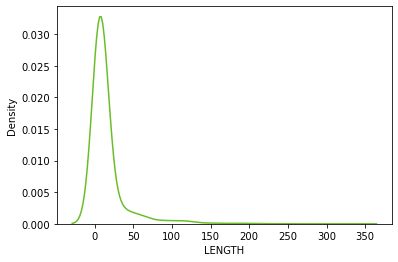

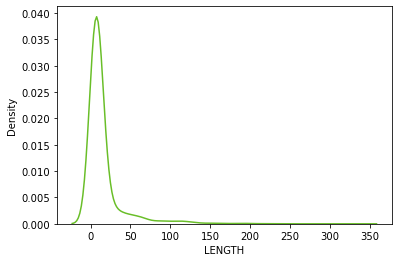

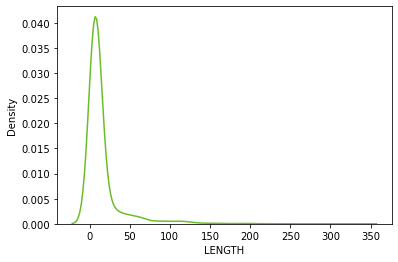

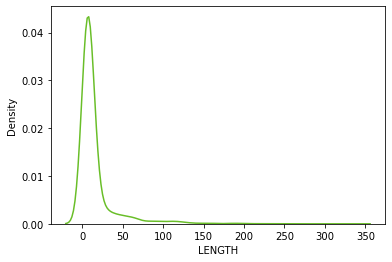

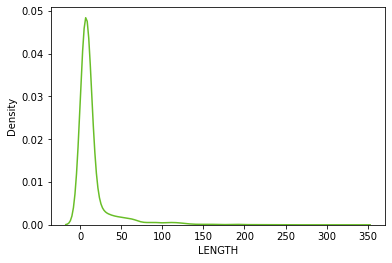

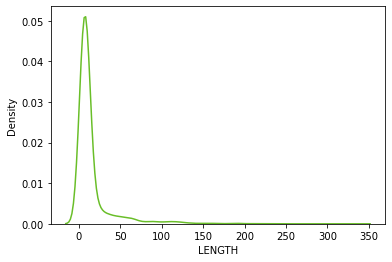

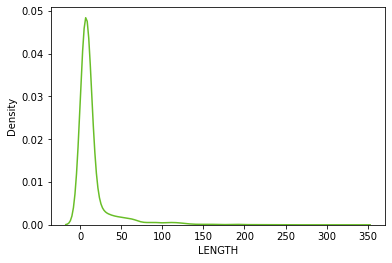

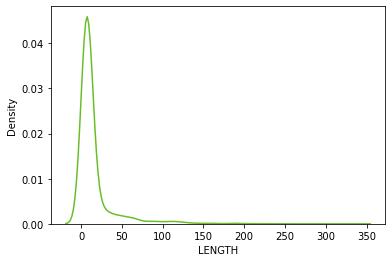

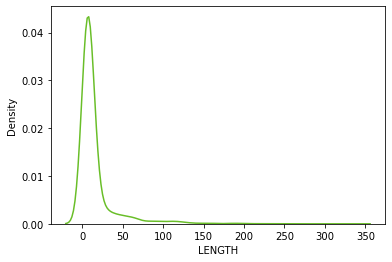

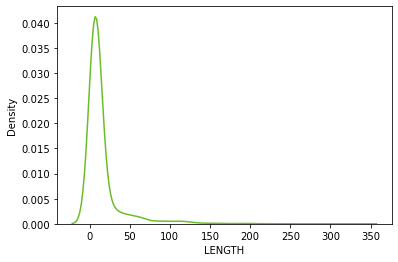

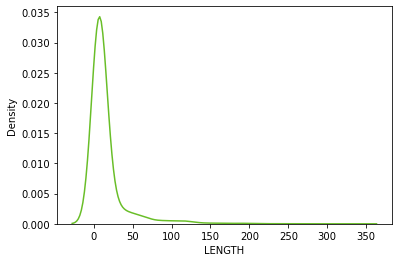

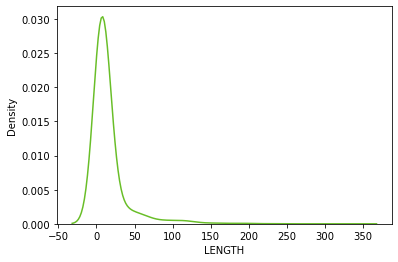

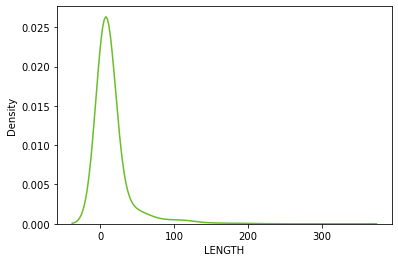

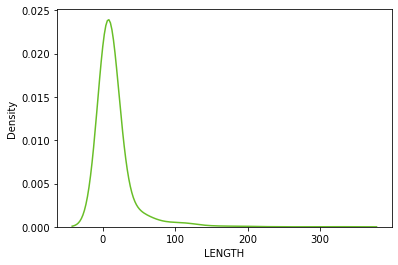

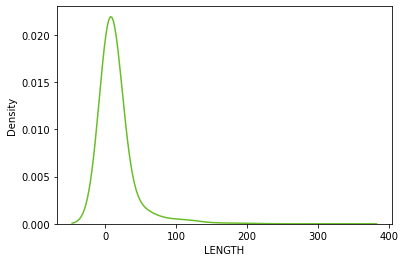

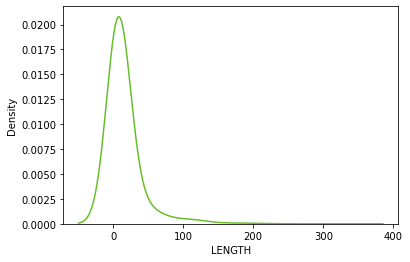

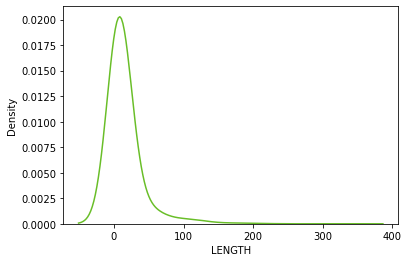

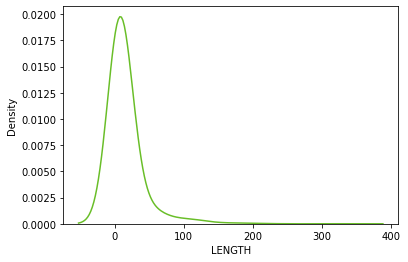

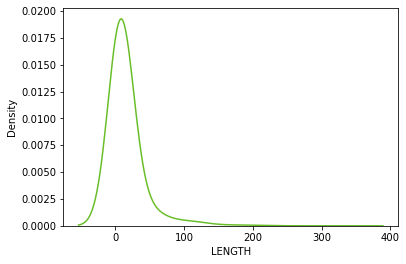

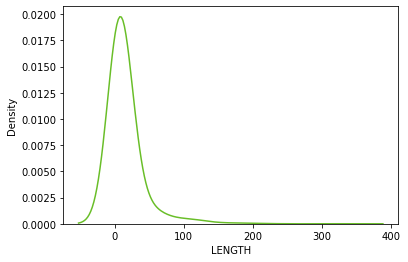

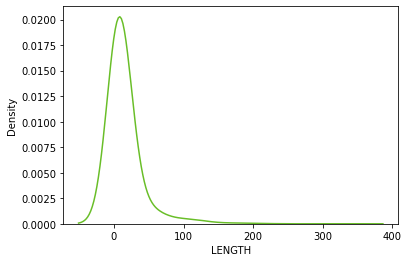

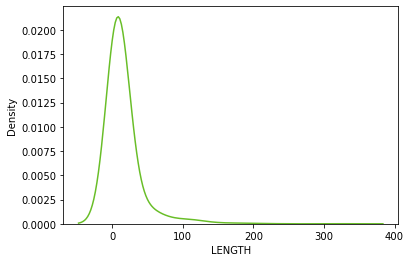

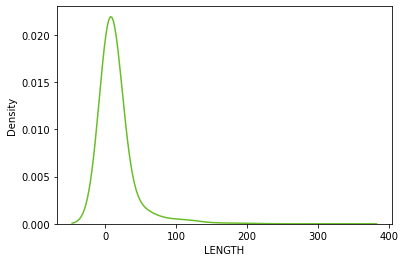

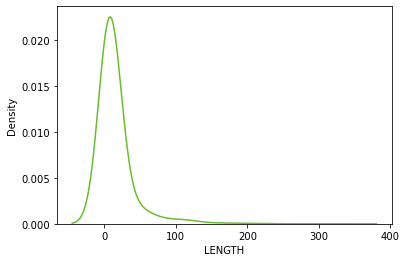

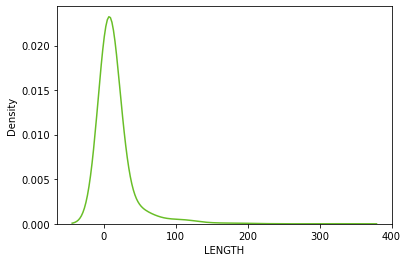

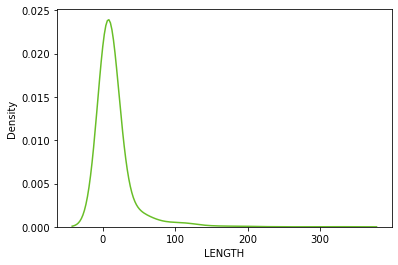

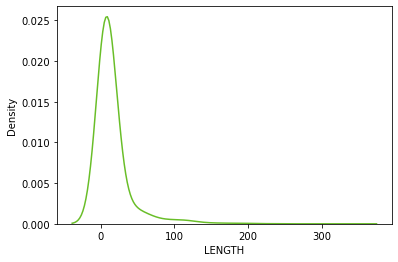

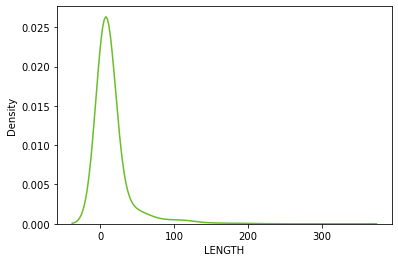

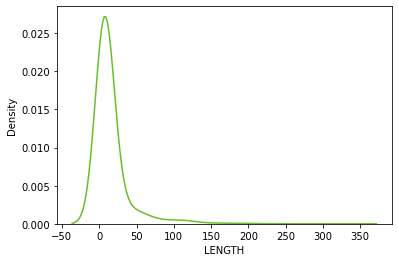

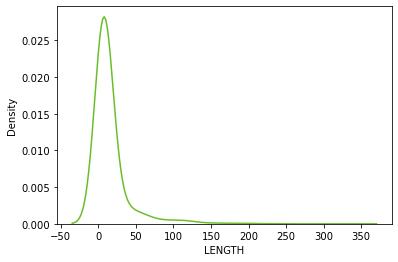

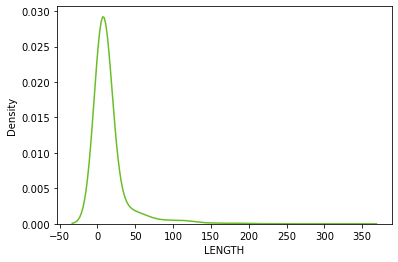

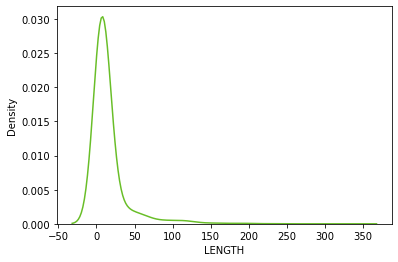

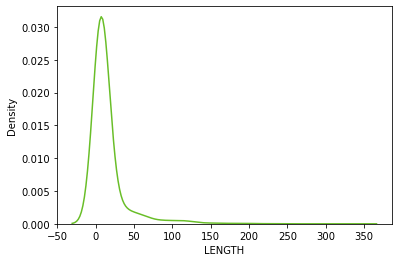

In [28]:
widgets.interact(make_kde, bw=(0.1,5,0.1))

<AxesSubplot:xlabel='LENGTH', ylabel='Count'>

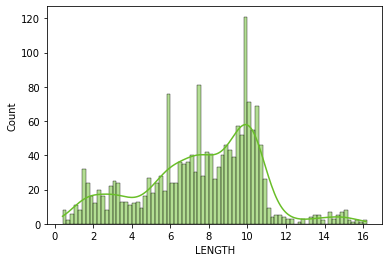

In [29]:
sea.histplot(data=fac_sampled, x="LENGTH", color=valecolor['VERDE2'], binwidth=0.2,kde=True)

<AxesSubplot:xlabel='LENGTH', ylabel='Count'>

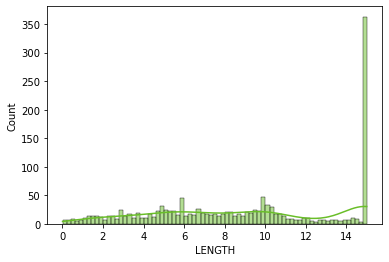

In [31]:
sea.histplot(data=cac_sampled, x="LENGTH", color=valecolor['VERDE2'], binwidth=0.2,kde=True)

In [307]:
bmf_gl.describe()

FEGL           SIGL            PGL           ALGL  \
count  136968.000000  136968.000000  136968.000000  136968.000000   
mean       49.441070      13.304019       0.075242       8.662822   
std        12.684295      19.342976       0.076701       9.962142   
min        16.415726       0.137378       0.002492       0.081567   
25%        38.955875       0.579287       0.014017       1.018666   
50%        45.906712       1.229977       0.034554       2.727524   
75%        63.876519      31.383811       0.122038      19.008227   
max        68.536018      65.376717       0.530436      38.396362   

                MNGL           PFGL           TIGL           MGGL  \
count  136968.000000  136968.000000  136968.000000  136968.000000   
mean        0.185258       5.918178       0.499236       0.118582   
std         0.399258       5.983248       0.570618       0.240566   
min        -0.477821       0.085368       0.006000       0.012659   
25%         0.043802       1.043169       0.058494       0.037231   
50%         0.069894       2.749101       0.151302       0.056393   
75%         0.145920      12.372250       0.990679       0.122146   
max         8.904000      22.135666       2.982000       3.312431   

                CAGL  
count  136968.000000  
mean        0.067111  
std         0.469473  
min         0.003456  
25%         0.012704  
50%         0.014638  
75%         0.018819  
max        10.036192

In [308]:
fso = fso[~fso['CLI'].isin(['SR', 'DT', 'BR'])]
fac = fac[~fac['CLI'].isin(['SR', 'DT', 'BR'])]
cac = cac[~cac['GEOCOD'].isin(['SR', 'DT', 'BR'])]

cac_hem = cac[cac['GEOCOD'].isin(['HC', 'HF'])]

In [309]:
cac_hem

COMPID         DHID        MIDX         MIDY     MIDZ  LENGTH    FROM  \
5     15MFLP      N3-0001  586895.431  9332336.874  650.324   11.05   21.10   
6     15MFLP      N3-0001  586895.431  9332336.874  644.149    1.30   32.15   
7     15MFLP      N3-0001  586895.431  9332336.874  638.854    9.29   33.45   
8     15MFLP      N3-0001  586895.431  9332336.874  633.654    1.11   42.74   
15    15MFLP      N3-0002  586498.534  9331934.449  641.464   10.38    6.16   
16    15MFLP      N3-0002  586498.534  9331934.449  632.229    8.09   16.54   
18    15MFLP      N3-0002  586498.534  9331934.449  627.434    0.50   25.13   
20    15MFLP      N3-0002  586498.534  9331934.449  626.434    0.50   26.13   
22    15MFLP      N3-0002  586498.534  9331934.449  623.259    5.05   27.03   
24    15MFLP      N3-0002  586498.534  9331934.449  617.899    4.47   32.68   
25    15MFLP      N3-0002  586498.534  9331934.449  614.014    3.30   37.15   
26    15MFLP      N3-0002  586498.534  9331934.449  609.174    6.38   40.45   
28    15MFLP      N3-0002  586498.534  9331934.449  604.399    1.61   47.61   
29    15MFLP      N3-0002  586498.534  9331934.449  602.444    2.30   49.22   
31    15MFLP      N3-0002  586498.534  9331934.449  599.924    1.64   52.07   
32    15MFLP      N3-0002  586498.534  9331934.449  597.304    3.60   53.71   
34    15MFLP      N3-0002  586498.534  9331934.449  591.054    7.20   58.16   
37    15MFLP      N3-0002  586498.534  9331934.449  581.404    6.80   68.01   
39    15MFLP      N3-0002  586498.534  9331934.449  576.554    0.60   75.96   
41    15MFLP      N3-0002  586498.534  9331934.449  574.424    1.66   77.56   
42    15MFLP      N3-0002  586498.534  9331934.449  572.204    2.78   79.22   
43    15MFLP      N3-0002  586498.534  9331934.449  569.864    1.90   82.00   
49    15MFLP      N3-0003  586898.687  9331736.706  655.150   10.31    6.22   
50    15MFLP      N3-0003  586898.687  9331736.706  649.195    1.60   16.53   
51    15MFLP      N3-0003  586898.687  9331736.706  647.645    1.50   18.13   
53    15MFLP      N3-0003  586898.687  9331736.706  645.650    1.29   20.23   
54    15MFLP      N3-0003  586898.687  9331736.706  644.255    1.50   21.52   
56    15MFLP      N3-0003  586898.687  9331736.706  641.255    1.50   24.52   
57    15MFLP      N3-0003  586898.687  9331736.706  637.640    5.73   26.02   
59    15MFLP      N3-0003  586898.687  9331736.706  632.455    1.00   33.57   
61    15MFLP      N3-0003  586898.687  9331736.706  627.780    7.35   35.07   
63    15MFLP      N3-0003  586898.687  9331736.706  623.320    1.43   42.49   
64    15MFLP      N3-0003  586898.687  9331736.706  622.355    0.50   43.92   
65    15MFLP      N3-0003  586898.687  9331736.706  618.405    7.40   44.42   
66    15MFLP      N3-0003  586898.687  9331736.706  613.155    3.10   51.82   
67    15MFLP      N3-0003  586898.687  9331736.706  610.905    1.40   54.92   
68    15MFLP      N3-0003  586898.687  9331736.706  607.855    4.70   56.32   
70    15MFLP      N3-0003  586898.687  9331736.706  604.405    1.00   61.62   
72    15MFLP      N3-0003  586898.687  9331736.706  602.355    1.10   63.62   
78    15MFLP      N3-0003  586898.687  9331736.706  588.745    1.02   77.27   
79    15MFLP      N3-0003  586898.687  9331736.706  586.735    3.00   78.29   
80    15MFLP      N3-0003  586898.687  9331736.706  584.160    2.15   81.29   
81    15MFLP      N3-0003  586898.687  9331736.706  581.215    3.74   83.44   
82    15MFLP      N3-0003  586898.687  9331736.706  578.695    1.30   87.18   
83    15MFLP      N3-0003  586898.687  9331736.706  577.195    1.70   88.48   
86    15MFLP      N3-0003  586898.687  9331736.706  571.215    1.90   94.36   
87    15MFLP      N3-0003  586898.687  9331736.706  567.865    4.80   96.26   
89    15MFLP      N3-0003  586898.687  9331736.706  561.355    2.90  103.72   
90    15MFLP      N3-0003  586898.687  9331736.706  552.405   15.00  106.62   
91    15MFLP      N3-0003  586898.687  9331736.706  542.

<AxesSubplot:xlabel='FEGL', ylabel='Count'>

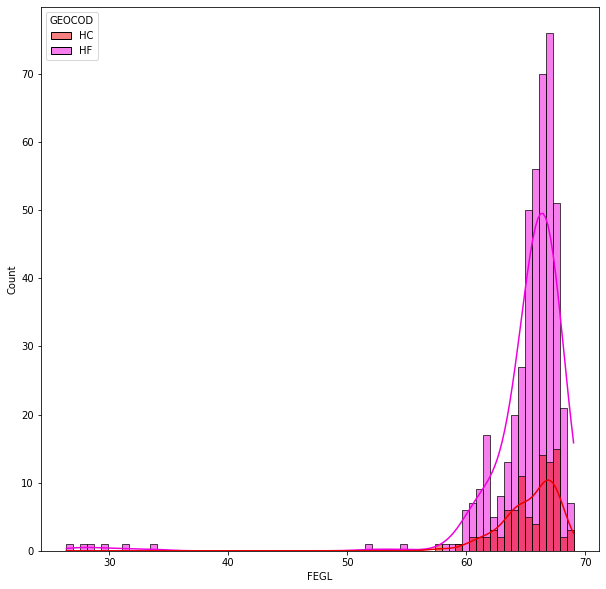

In [310]:
fig=plt.figure(figsize=chart_size)

sea.histplot(data= cac_hem, x=cac_hem['FEGL'], hue=cac_hem['GEOCOD'], palette=litocolor, kde=True)

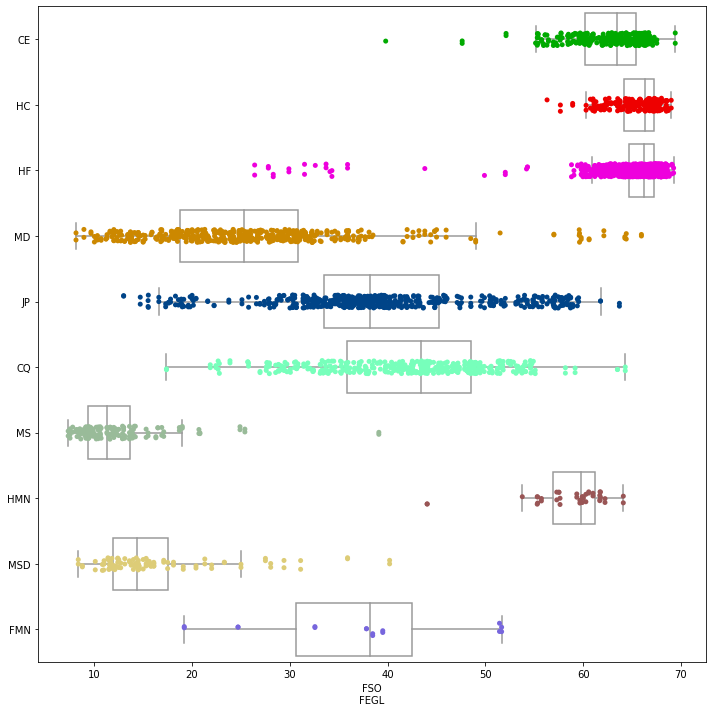

In [311]:
fig=plt.figure(figsize=chart_size)

#sea.boxplot(x=fso.FEGL, y=fso.CLI, whis=0, color='white', fliersize=0)
sea.boxplot(x=fso.FEGL, y=fso.CLI, color='white', fliersize=0)
sea.stripplot(x=fso.FEGL, y=fso.CLI, palette=litocolor)
sea.stripplot(x=fac.FEGL, y=fac.CLI, palette=litocolor)
plt.xlabel('FSO\nFEGL')
plt.ylabel('')
#plt.yticks([0, 1, 2], ['USA', 'Europe', 'Japan'])
plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\categorical.py:1138: UserWarning: You passed a edgecolor/edgecolors ('#292929') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(strip_data, cat_pos, **kws)


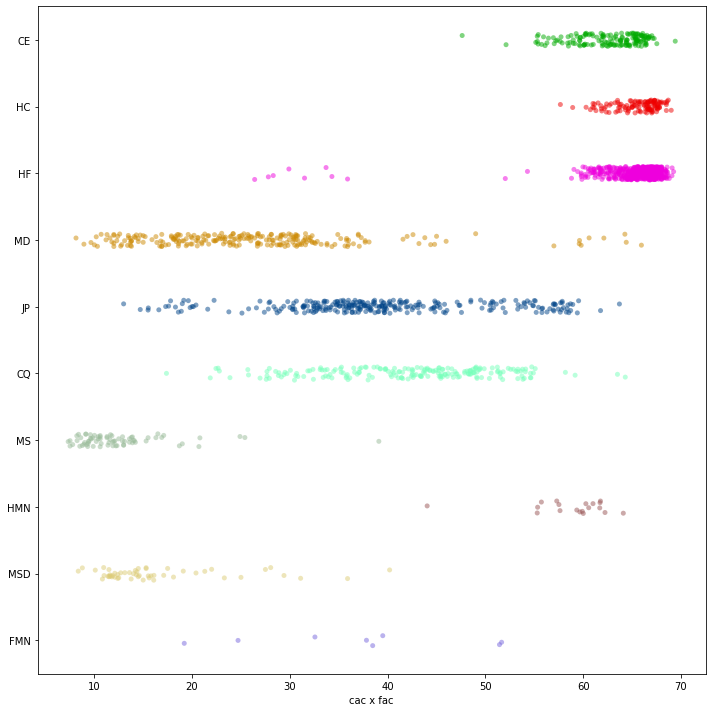

In [312]:
fig=plt.figure(figsize=chart_size)

#sea.boxplot(x=fso.FEGL, y=fso.CLI, whis=0, color='white', fliersize=0)
#sea.boxplot(x=fso.FEGL, y=fso.CLI, color='white', fliersize=0)
sea.stripplot(x=cac['FEGL'], y=cac['GEOCOD'], palette=litocolor, marker='+')
sea.stripplot(x=fac.FEGL, y=fac.CLI, palette=litocolor, alpha = 0.5)
plt.xlabel('cac x fac')
plt.ylabel('')
#plt.yticks([0, 1, 2], ['USA', 'Europe', 'Japan'])
plt.tight_layout();

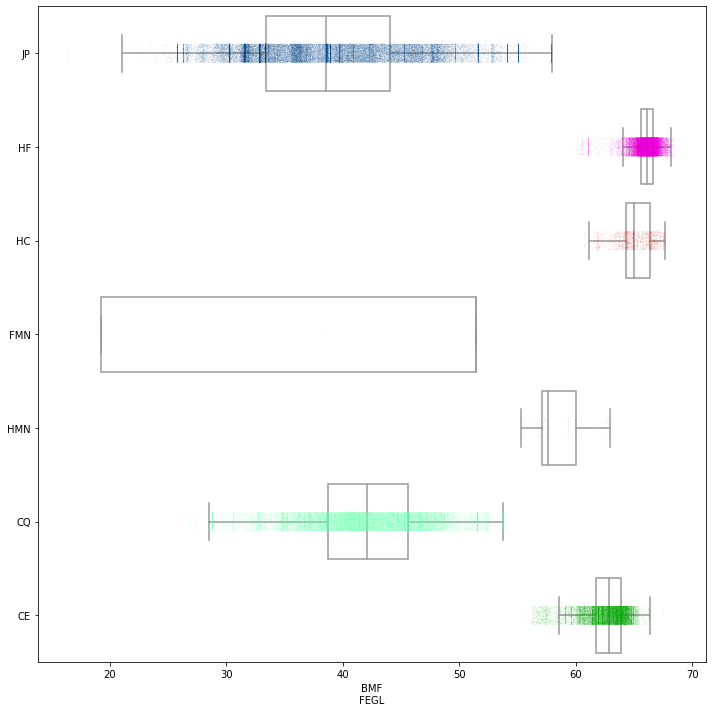

In [313]:
fig=plt.figure(figsize=chart_size)

#sea.boxplot(x=fso.FEGL, y=fso.CLI, whis=0, color='white', fliersize=0)
sea.boxplot(x=bmf.FEGL, y=bmf.LITO, color='white', fliersize=0)
#sea.stripplot(x=bmf.FEGL, y=bmf.LITO, palette=litocolor)
sea.stripplot(x=bmf.FEGL, y=bmf.LITO, palette=litocolor,  size=0.3)
plt.xlabel('BMF\nFEGL')
plt.ylabel('')

plt.tight_layout();

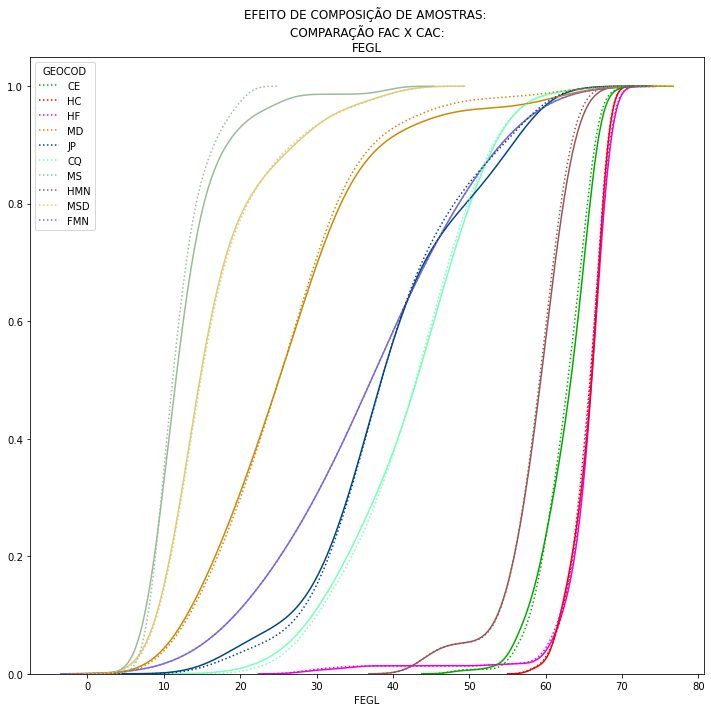

In [314]:
fig=plt.figure(figsize=chart_size)
grade='FEGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)

plt.tight_layout();

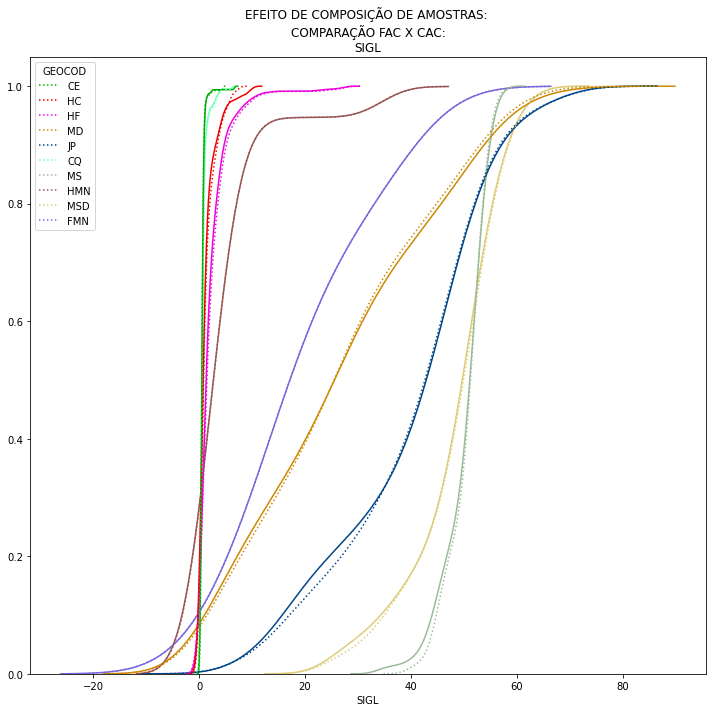

In [315]:
fig=plt.figure(figsize=chart_size)
grade='SIGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

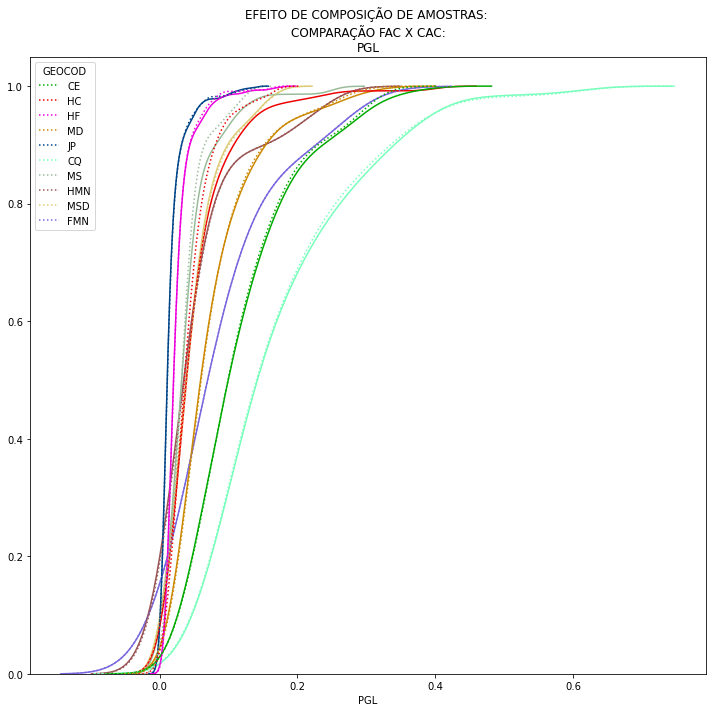

In [316]:
fig=plt.figure(figsize=chart_size)
grade='PGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

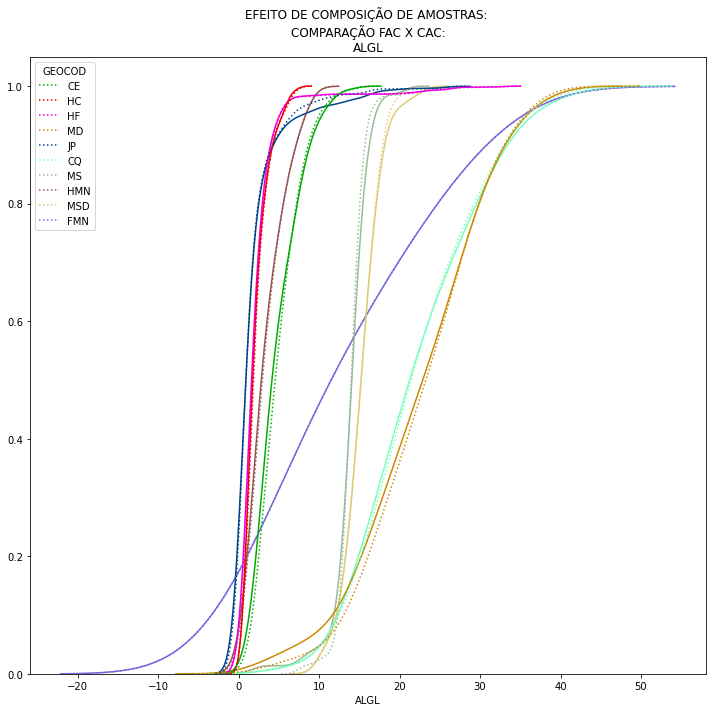

In [317]:
fig=plt.figure(figsize=chart_size)
grade='ALGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

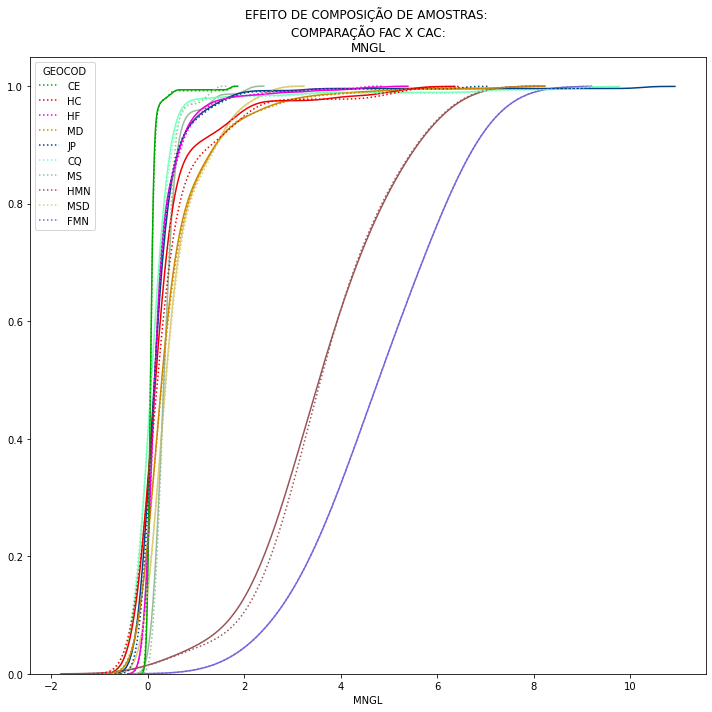

In [318]:
fig=plt.figure(figsize=chart_size)
grade='MNGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

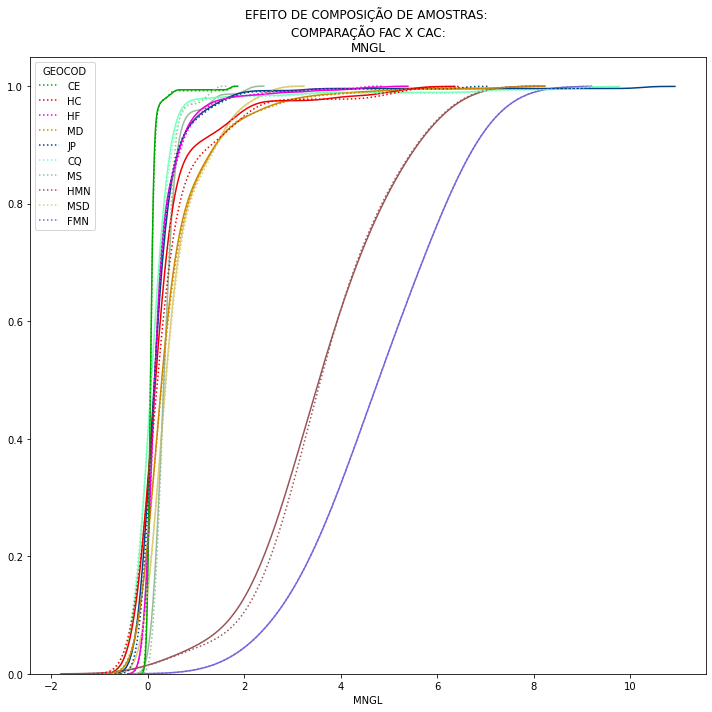

In [319]:
fig=plt.figure(figsize=chart_size)
grade='MNGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

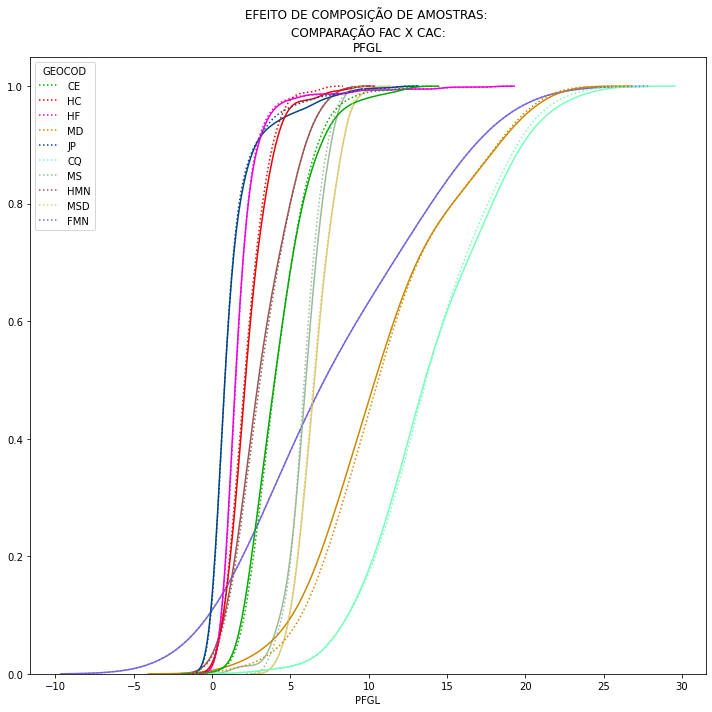

In [320]:
fig=plt.figure(figsize=chart_size)
grade='PFGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

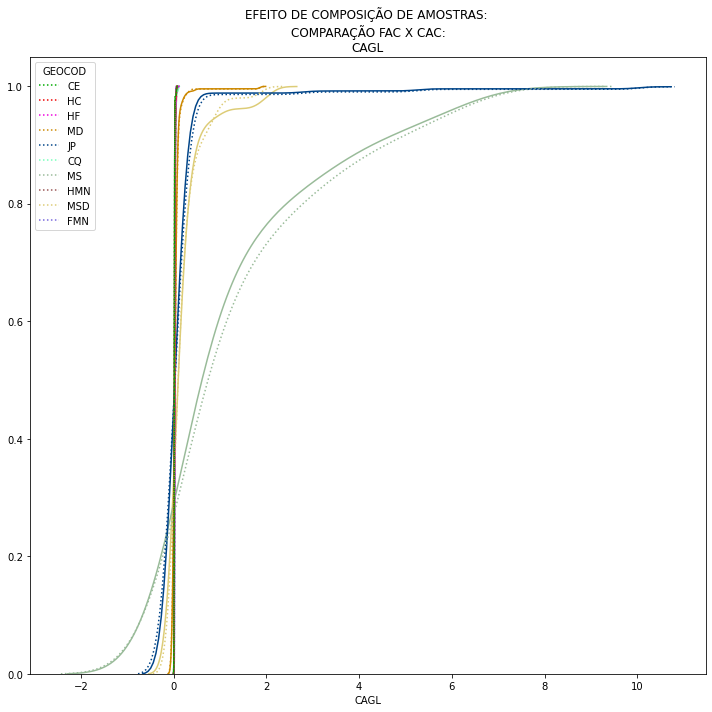

In [321]:
fig=plt.figure(figsize=chart_size)
grade='CAGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

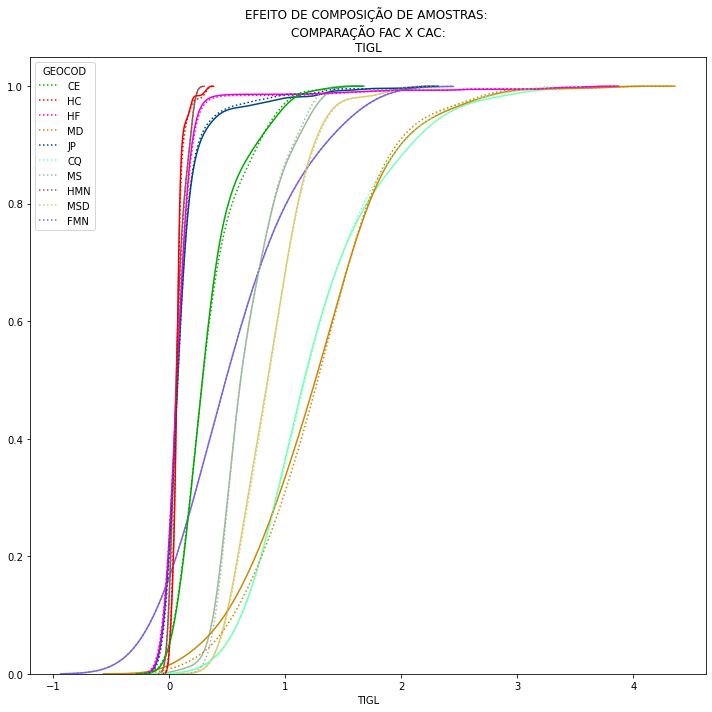

In [322]:
fig=plt.figure(figsize=chart_size)
grade='TIGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

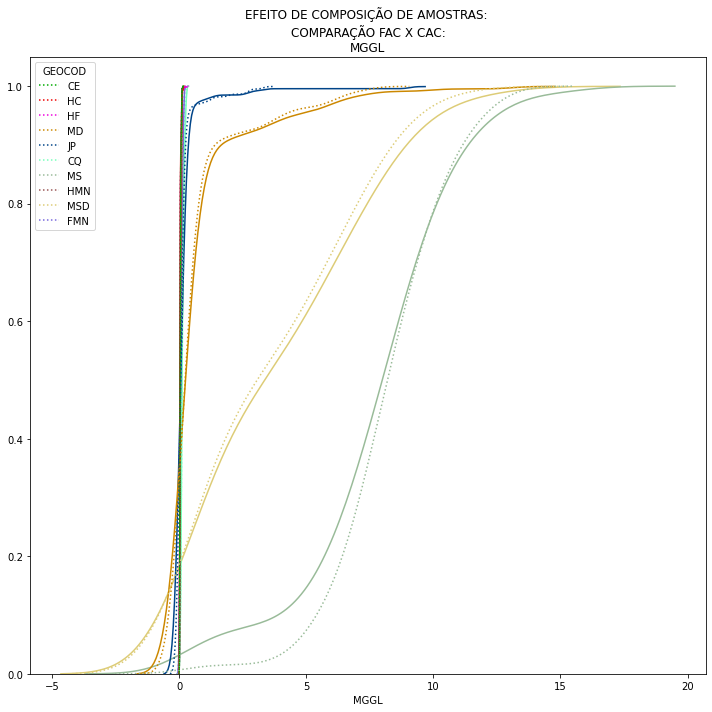

In [323]:
fig=plt.figure(figsize=chart_size)
grade='MGGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


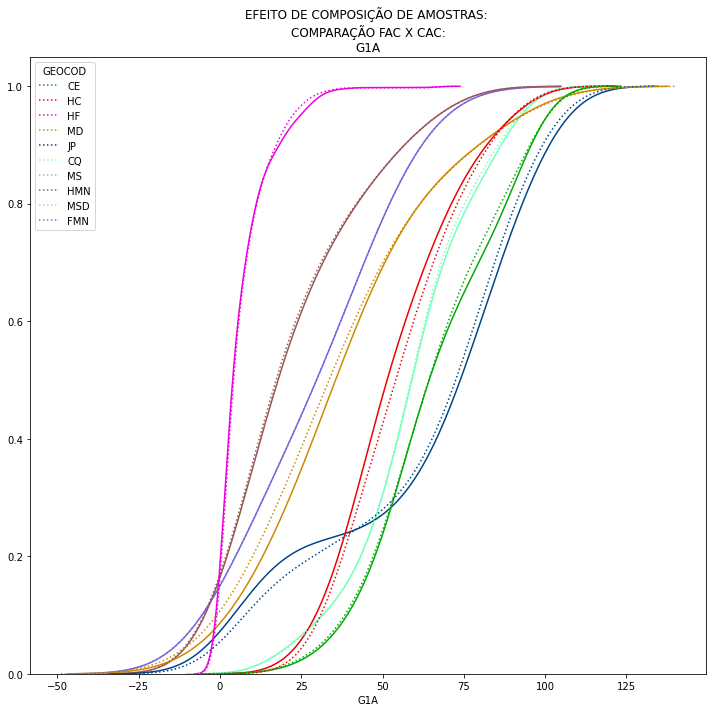

In [324]:
fig=plt.figure(figsize=chart_size)
grade='G1A'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


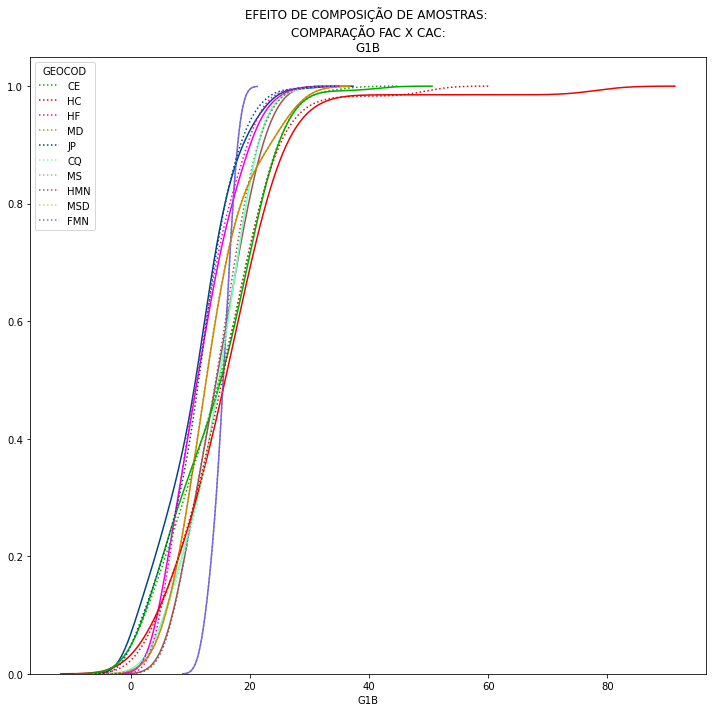

In [325]:
fig=plt.figure(figsize=chart_size)
grade='G1B'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


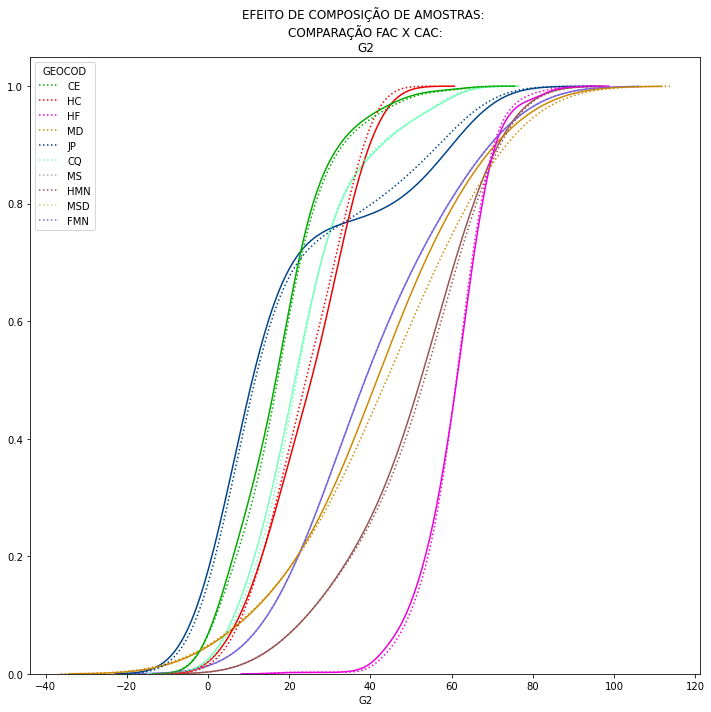

In [326]:
fig=plt.figure(figsize=chart_size)
grade='G2'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


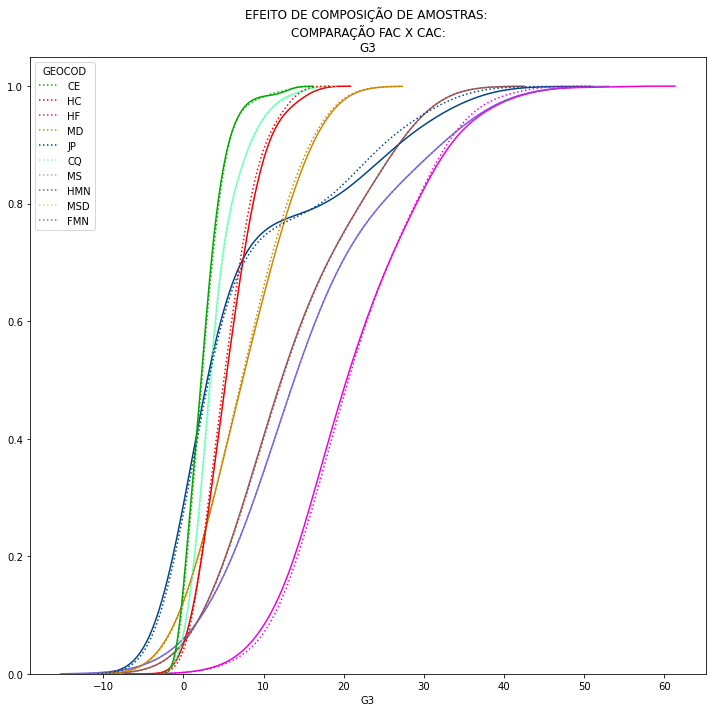

In [327]:
fig=plt.figure(figsize=chart_size)
grade='G3'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

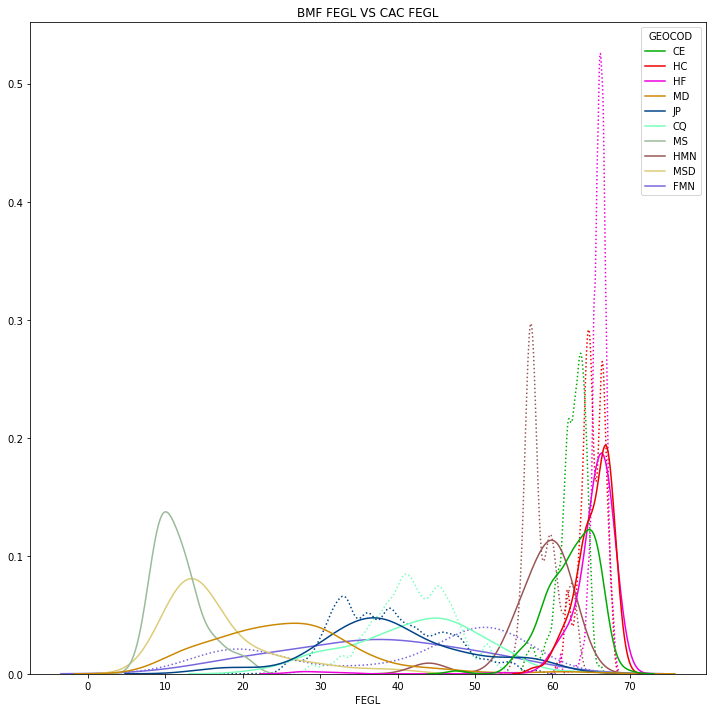

In [328]:
fig=plt.figure(figsize=chart_size)

sea.kdeplot(data=bmf, x=bmf.FEGL, hue='LITO',  common_norm=False, palette=litocolor, alpha=0.5, ls=":")
sea.kdeplot(data=cac, x=cac.FEGL, hue='GEOCOD',  common_norm=False, palette=litocolor)
plt.title('BMF FEGL VS CAC FEGL')
plt.xlabel('FEGL')
plt.ylabel('')

plt.tight_layout();